# This script contains the following:
- Import libraries
- Load datasets
- Checking dataframes
- Create a bar char days of order
- Create Histogram for prices
- Find & remove outliers
- Histogram & scatter plot for distribution of prices
- Line chart of average prices by day of the week
    - Creating smaller samples
    - line chart with a 30% sample
- Create histogram of orders by time of day
- Checking for price distribution
- Distribution of orders according to customer loyalty
- Line chart of expenditure by the hour of the day
- Line chart of connection between age and number of dependents
- Scatter plot of connection between age & income

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Import dataframe

In [2]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data_Analyst/Course_Career_foundry/A4_Python/2023.08_Instacart_basket_analysis/02_data'
all_data_file_path = os.path.join(path, 'prepared data', 'all_data')

# Import the dataframe
df = pd.read_pickle(all_data_file_path)

In [3]:
# Checking columns of data frame
df.columns

Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

# Create a bar char days of order

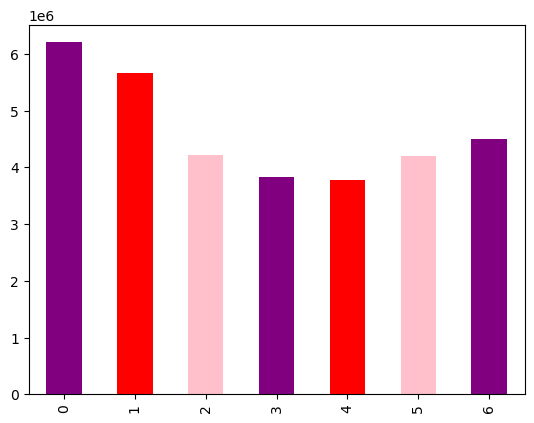

In [4]:
# Create a bar chart for the day of orders
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink']) 
# 0=saturday, 1=sunday, ...


/var/folders/xh/_q4grmbx5wv2fs3fc3vrkwmc0000gn/T/ipykernel_58416/2039142523.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Reds')


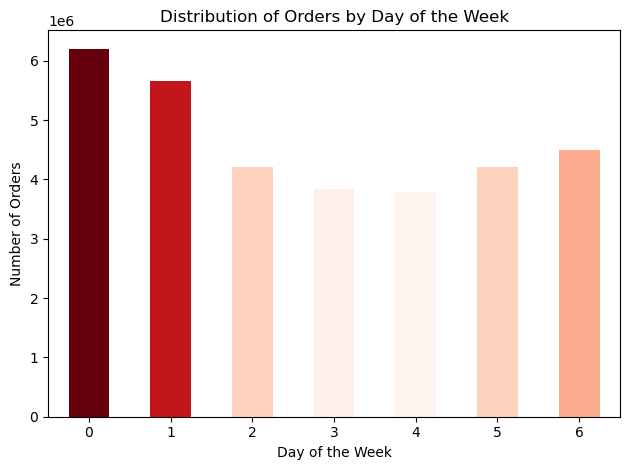

In [5]:
# Calculate the frequency of orders for each day of the week
order_counts = df['orders_day_of_week'].value_counts().sort_index()

# Define a colormap with a gradient from light to dark
colormap = plt.cm.get_cmap('Reds')

# Normalize order counts to range [0, 1]
norm = plt.Normalize(order_counts.min(), order_counts.max())

# Create a bar chart with gradient colors
bar = order_counts.plot.bar(color=[colormap(norm(count)) for count in order_counts])

# Customize the chart
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the chart
plt.show()


# Create Histogram for prices

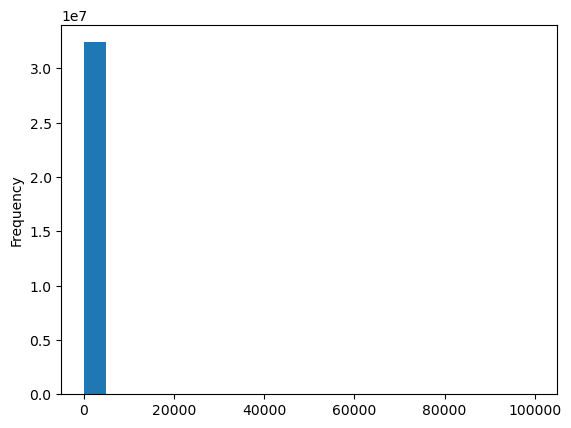

In [6]:
# Histogram for prices
hist = df['prices'].plot.hist(bins = 20)

NOTE: we have outliers in prices. Let's remove it before printing any chart

# Find & remove outliers

In [7]:
# find outliers above 100$
df.loc[df['prices'] > 100]

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553.0,15.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,6.0,Frequent customer,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553.0,28.0,1.0,Lowfat 2% Milkfat Cottage Cheese,...,6.0,Frequent customer,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553.0,1.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,5.0,Frequent customer,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664.0,2.0,0.0,2 % Reduced Fat Milk,...,8.0,Frequent customer,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553.0,3.0,0.0,Lowfat 2% Milkfat Cottage Cheese,...,14.0,Regular customer,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664.0,2.0,1.0,2 % Reduced Fat Milk,...,13.0,Regular customer,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664.0,1.0,0.0,2 % Reduced Fat Milk,...,13.0,Regular customer,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664.0,14.0,0.0,2 % Reduced Fat Milk,...,23.0,Non-frequent customer,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664.0,4.0,0.0,2 % Reduced Fat Milk,...,6.0,Frequent customer,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


### 5127 products above the 100$ threshold

In [8]:
# remove outliers
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [9]:
# Check maximum prices
df['prices'].max()

25.0

# Histogram & scatter plot for distribution of prices

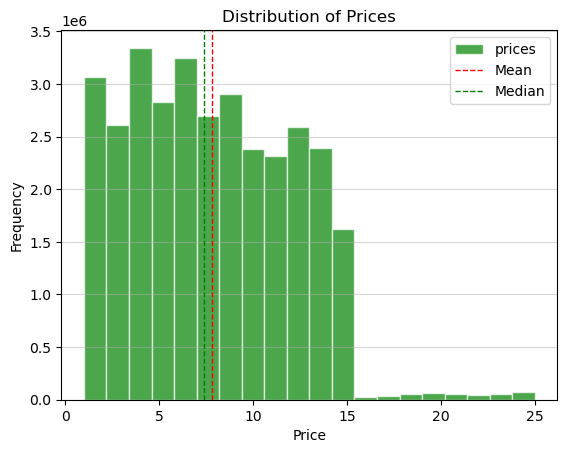

In [10]:
# Create a histogram of the 'prices' column
hist = df['prices'].plot.hist(bins=20, color='green', edgecolor='white', alpha=0.7)

# Customize the plot
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)

# Add vertical lines for mean and median
plt.axvline(df['prices'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['prices'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

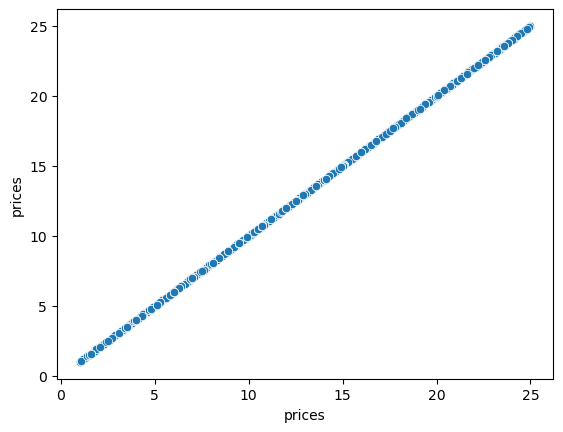

In [11]:
# Scatter plot fro prices
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df)

# Line chart of average prices by day of the week


## Creating a sample on random values to avoid overload and crash on system

In [12]:
# create a list holding boolean values to test  np.random.seed() <=7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [13]:
# store 30% of the data sample in small
small = df[~dev]

In [14]:
# store 70% of the data sample in big
big = df[dev]

In [15]:
# Checking samples
len(df)

32404859

In [16]:
# Checking samples
len(small) + len(big)

32404859

NOTE: the sample is the same length. lets move to the line chart based on 30% of sample

## Line chart with sample 30% of dataframe

In [17]:
# creating dataframe with day of order & price as small sample
df_30 = small[['orders_day_of_week','prices']]
df_30

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


([<matplotlib.axis.XTick at 0x16ad12bd0>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

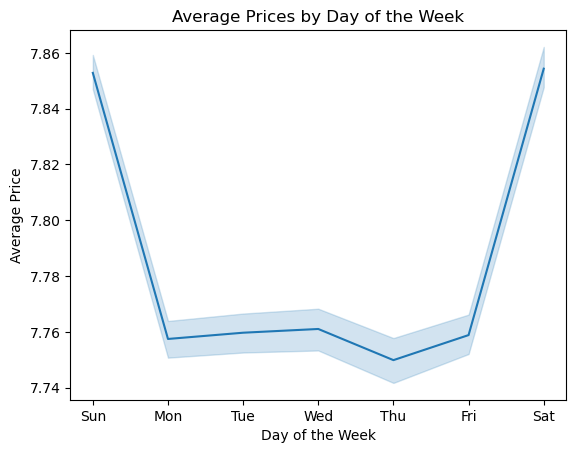

In [18]:
# Create a line plot
line = sns.lineplot(data = df_30, x = 'orders_day_of_week',y = 'prices')

# Customize the plot
plt.title('Average Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


# Create histogram of orders by time of day

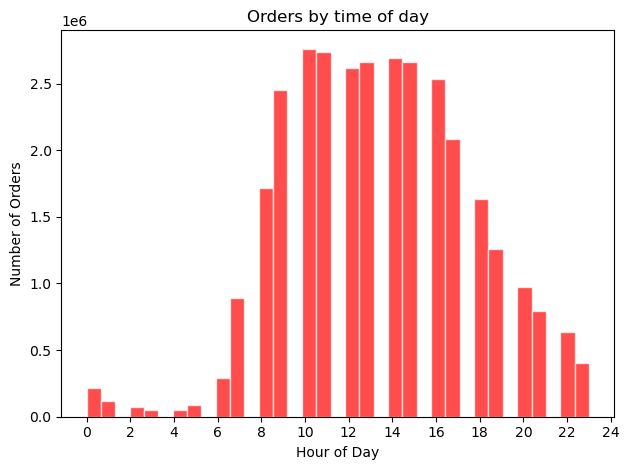

In [19]:
# Create a histogram showing orders by time of day
hr_of_day_hist = df['order_hour_of_day'].plot.hist(bins=35, color='red', edgecolor='white', alpha=0.7)

# Customize the plot
plt.title('Orders by time of day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 25, 2))  # Show every 2 hours on the x-axis
plt.tight_layout()  # Improve spacing

# Show the plot
plt.show()

NOTE: the peak period is between 10h & 15h. The most orders occurs between 10h & 11h.

# Checking for price distribution

In [20]:
# Descriptive stats to know price distribution
resume_prices = df['prices'].describe()
round(resume_prices,1)

count    32399732.0
mean            7.8
std             4.2
min             1.0
25%             4.2
50%             7.4
75%            11.3
max            25.0
Name: prices, dtype: float64

# Distribution of orders according to customer loyalty

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   number_order_client     int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_price              float64
 20  spending_flag           object 
 21  median_days             float

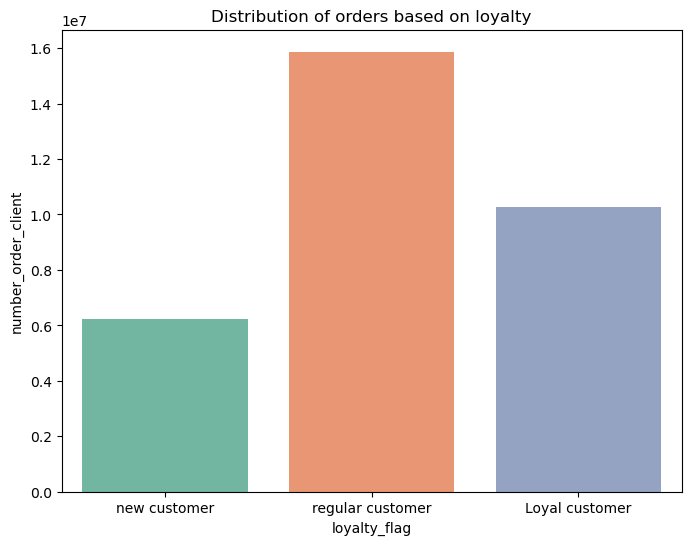

In [22]:
# Create a bar chart of the "loyalty_flag" distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loyalty_flag', palette='Set2')
plt.title('Distribution of orders based on loyalty')
plt.xlabel('loyalty_flag')
plt.ylabel('number_order_client')
plt.show()

NOTE: Regular customers order more often than loyal customer

# Line chart of expenditure by the hour of the day

In [23]:
# defining a new subset for order_hour_of_day and prices
df_2 = big[['order_hour_of_day','prices']]

NOTE: a sample representing 70% of random values of data set has been used for this subset

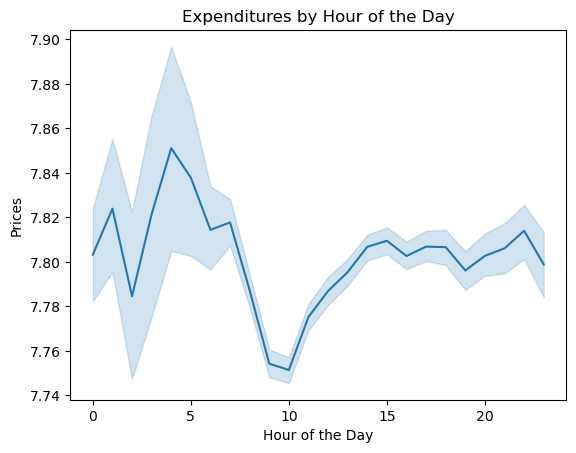

In [24]:
# Create a line chart to visualize expenditures by hour of the day
price_per_hour = sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')

# Set chart title and axis labels
plt.title('Expenditures by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Prices')
plt.show()

### It appears that the expenditures are the highest around 4 AM and the least around 10 AM

# Line chart of connection between age and number of dependents

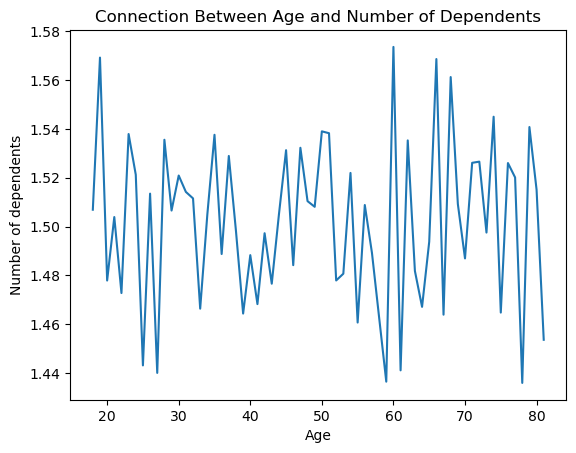

In [25]:
# Calculate the average number of dependents for each age group
avg_dependents_per_age = df.groupby('age')['n_dependants'].mean().reset_index()

# Create a line chart to explore the connection between age and number of dependents
sns.lineplot(data=avg_dependents_per_age, x='age', y='n_dependants')
plt.title('Connection Between Age and Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of dependents')
plt.show()

NOTE: The line chart shows the number of dependants regarding the age.there is no significative correlation between those 2 variables

# Scatter plot of connection between age & income

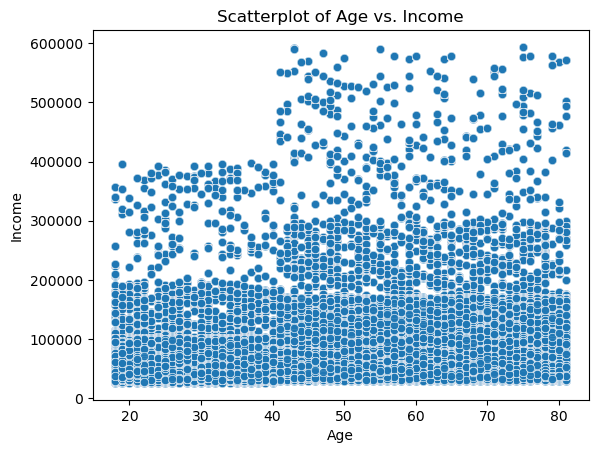

In [26]:
# Create a scatterplot to explore the connection between age and income
sns.scatterplot(data=df, x='age', y='income', alpha=0.5)

# Add a title and labels
plt.title('Scatterplot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()

### NOTE: a dense part of the customer have income under 200 000$. Only after 40 Years old, the customers make over 400 k.

### All the vizs have been exported  with the dedicated function on vs code